In [1]:
import os
import random
import pickle
import torch
import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm
from tifffile import imread
from torch.utils.data import Dataset, DataLoader
from matplotlib import pyplot as plt
from skimage.measure import regionprops_table
from scipy.stats import pearsonr, spearmanr, gaussian_kde
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

In [2]:
class SingleCellDataset(Dataset):
    def __init__(self, x_, y_):
        super().__init__()
        x_ = np.array(x_)*10 # avoid small value problems
        x_ = np.expand_dims(x_, 1)
        self.x = x_
        self.y = np.array(y_).reshape(-1,1)  

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return torch.from_numpy(self.x[idx]).float(), torch.from_numpy(self.y[idx]).float()
    
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2), 

            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 2 * 8, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc(x)
        return x

# Training setup
def train(x_train, y_train, x_test, y_test, epochs):
    train_dataset = SingleCellDataset(x_train, y_train)
    train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    
    test_dataset = SingleCellDataset(x_test, y_test)
    test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True)
    
    model = CNN().float()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    train_loss = []
    test_loss = []
    for i, epoch in tqdm(enumerate(range(epochs))):
        total_loss = 0.0
        for inputs, targets in train_dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        train_loss.append(total_loss)
        total_loss = 0.0
        for inputs, targets in test_dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
        test_loss.append(total_loss)
    return model, train_loss, test_loss
        
def test(x_, y_, model):
    model.eval()
    dataset = SingleCellDataset(x_, y_)
    dataloader = DataLoader(dataset, batch_size=16, shuffle=False)
    predictions = []
    for inputs, targets in dataloader:
        outputs = model(inputs)
        predictions+=list(outputs.detach())
    return np.array(predictions).flatten()

  0%|          | 0/13 [00:00<?, ?it/s]

DAPI
Loaded tiles


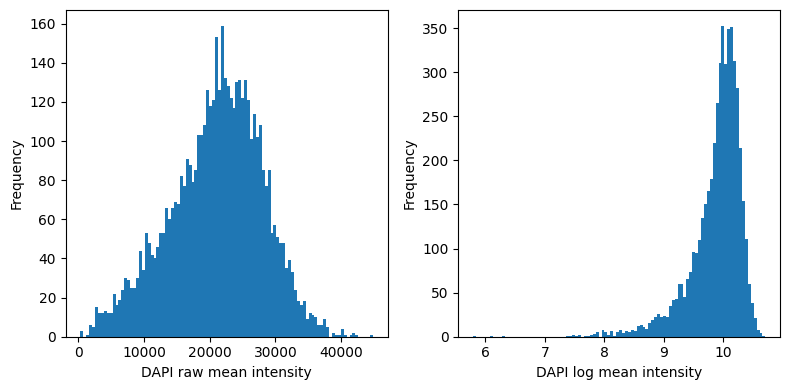

training



0it [00:00, ?it/s]
1it [00:05,  5.27s/it]
2it [00:08,  4.14s/it]
3it [00:13,  4.34s/it]
4it [00:15,  3.66s/it]
5it [00:19,  3.75s/it]
6it [00:24,  4.04s/it]
7it [00:27,  3.84s/it]
8it [00:32,  4.11s/it]
9it [00:34,  3.43s/it]
10it [00:39,  3.87s/it]
11it [00:43,  3.86s/it]
12it [00:44,  3.23s/it]
13it [00:46,  2.87s/it]
14it [00:50,  3.16s/it]
15it [00:53,  2.93s/it]
16it [00:57,  3.49s/it]
17it [01:03,  4.21s/it]
18it [01:11,  5.27s/it]
19it [01:16,  5.32s/it]
20it [01:21,  5.22s/it]
21it [01:28,  5.51s/it]
22it [01:36,  6.38s/it]
23it [01:41,  6.09s/it]
24it [01:52,  7.33s/it]
25it [01:57,  6.69s/it]
26it [02:04,  6.78s/it]
27it [02:08,  6.10s/it]
28it [02:11,  5.10s/it]
29it [02:14,  4.55s/it]
30it [02:17,  3.96s/it]
31it [02:24,  4.82s/it]
32it [02:27,  4.21s/it]
33it [02:30,  3.94s/it]
34it [02:35,  4.13s/it]
35it [02:39,  4.27s/it]
36it [02:43,  4.23s/it]
37it [02:47,  3.99s/it]
38it [02:49,  3.48s/it]
39it [02:52,  3.25s/it]
40it [02:55,  3.20s/it]
41it [03:00,  3.69s/it]
42it 

CD8
Loaded tiles


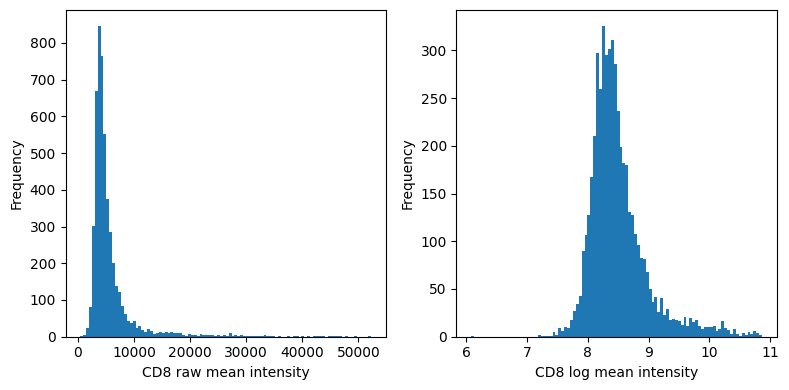

training



0it [00:00, ?it/s]
1it [00:04,  4.41s/it]
2it [00:08,  4.23s/it]
3it [00:14,  4.92s/it]
4it [00:17,  4.38s/it]
5it [00:21,  4.08s/it]
6it [00:24,  3.70s/it]
7it [00:30,  4.44s/it]
8it [00:34,  4.23s/it]
9it [00:38,  4.45s/it]
10it [00:44,  4.93s/it]
11it [00:48,  4.41s/it]
12it [00:56,  5.66s/it]
13it [01:01,  5.29s/it]
14it [01:04,  4.63s/it]
15it [01:09,  4.70s/it]
16it [01:12,  4.20s/it]
17it [01:14,  3.63s/it]
18it [01:18,  3.69s/it]
19it [01:22,  3.70s/it]
20it [01:25,  3.52s/it]
21it [01:30,  3.98s/it]
22it [01:33,  3.86s/it]
23it [01:42,  5.38s/it]
24it [01:45,  4.65s/it]
25it [01:50,  4.64s/it]
26it [01:52,  3.93s/it]
27it [01:54,  3.47s/it]
28it [01:58,  3.40s/it]
29it [02:02,  3.54s/it]
30it [02:04,  3.18s/it]
31it [02:11,  4.48s/it]
32it [02:15,  4.10s/it]
33it [02:18,  3.81s/it]
34it [02:22,  3.82s/it]
35it [02:24,  3.33s/it]
36it [02:28,  3.50s/it]
37it [02:32,  3.86s/it]
38it [02:36,  3.85s/it]
39it [02:39,  3.67s/it]
40it [02:42,  3.47s/it]
41it [02:46,  3.62s/it]
42it 

CD3
Loaded tiles


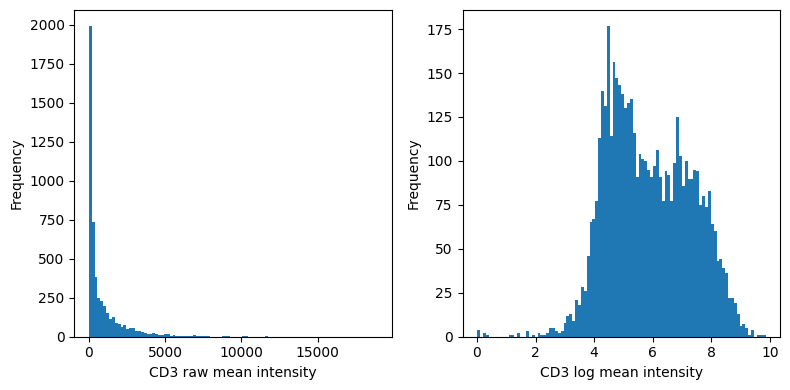

training



0it [00:00, ?it/s]
1it [00:02,  2.61s/it]
2it [00:06,  3.14s/it]
3it [00:09,  3.27s/it]
4it [00:12,  3.34s/it]
5it [00:21,  5.30s/it]
6it [00:26,  5.18s/it]
7it [00:30,  4.70s/it]
8it [00:33,  4.21s/it]
9it [00:36,  3.76s/it]
10it [00:43,  4.88s/it]
11it [00:47,  4.50s/it]
12it [00:51,  4.27s/it]
13it [00:53,  3.58s/it]
14it [00:56,  3.57s/it]
15it [01:00,  3.76s/it]
16it [01:04,  3.70s/it]
17it [01:06,  3.23s/it]
18it [01:09,  3.02s/it]
19it [01:11,  2.69s/it]
20it [01:14,  2.87s/it]
21it [01:26,  5.69s/it]
22it [01:30,  5.04s/it]
23it [01:32,  4.26s/it]
24it [01:34,  3.49s/it]
25it [01:38,  3.69s/it]
26it [01:42,  3.95s/it]
27it [01:46,  3.75s/it]
28it [01:58,  6.33s/it]
29it [02:03,  5.77s/it]
30it [02:06,  5.16s/it]
31it [02:10,  4.65s/it]
32it [02:13,  4.28s/it]
33it [02:17,  4.25s/it]
34it [02:20,  3.80s/it]
35it [02:23,  3.56s/it]
36it [02:27,  3.54s/it]
37it [02:30,  3.37s/it]
38it [02:32,  3.18s/it]
39it [02:37,  3.79s/it]
40it [02:47,  5.66s/it]
41it [02:50,  4.82s/it]
42it 

CD20
Loaded tiles


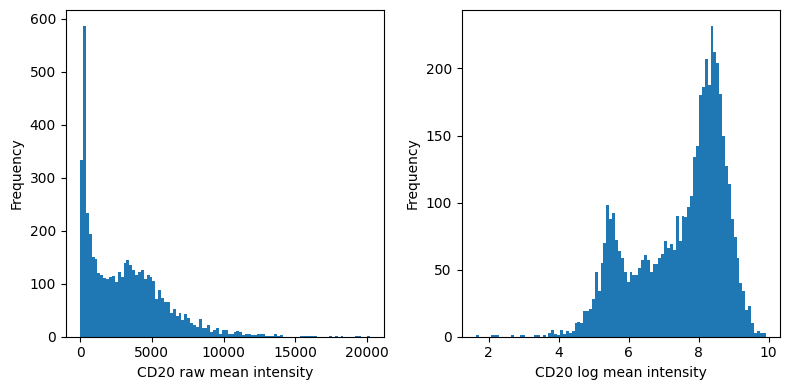

training



0it [00:00, ?it/s]
1it [00:05,  5.48s/it]
2it [00:08,  4.32s/it]
3it [00:12,  3.93s/it]
4it [00:16,  4.10s/it]
5it [00:23,  4.86s/it]
6it [00:25,  4.07s/it]
7it [00:29,  4.04s/it]
8it [00:32,  3.69s/it]
9it [00:37,  3.95s/it]
10it [00:40,  3.81s/it]
11it [00:43,  3.62s/it]
12it [00:45,  3.18s/it]
13it [00:48,  2.95s/it]
14it [00:51,  3.16s/it]
15it [00:54,  2.92s/it]
16it [00:56,  2.65s/it]
17it [00:58,  2.58s/it]
18it [01:02,  3.08s/it]
19it [01:05,  2.81s/it]
20it [01:07,  2.65s/it]
21it [01:10,  2.82s/it]
22it [01:13,  2.68s/it]
23it [01:15,  2.74s/it]
24it [01:19,  2.95s/it]
25it [01:22,  3.10s/it]
26it [01:28,  3.84s/it]
27it [01:31,  3.77s/it]
28it [01:35,  3.75s/it]
29it [01:39,  3.89s/it]
30it [01:41,  3.22s/it]
31it [01:46,  3.86s/it]
32it [01:51,  4.07s/it]
33it [01:55,  3.98s/it]
34it [01:58,  3.70s/it]
35it [02:01,  3.64s/it]
36it [02:05,  3.72s/it]
37it [02:09,  3.63s/it]
38it [02:12,  3.70s/it]
39it [02:15,  3.34s/it]
40it [02:18,  3.31s/it]
41it [02:22,  3.40s/it]
42it 

Ki67
Loaded tiles


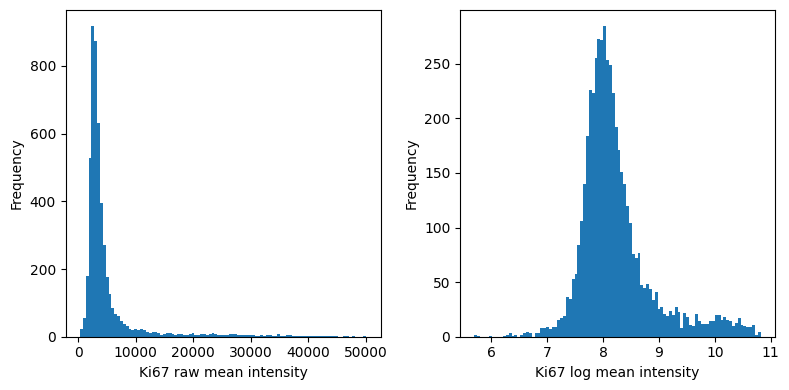

training



0it [00:00, ?it/s]
1it [00:05,  5.70s/it]
2it [00:08,  4.14s/it]
3it [00:10,  3.21s/it]
4it [00:13,  2.83s/it]
5it [00:15,  2.68s/it]
6it [00:18,  2.61s/it]
7it [00:25,  4.37s/it]
8it [00:28,  3.81s/it]
9it [00:31,  3.49s/it]
10it [00:33,  3.15s/it]
11it [00:39,  4.04s/it]
12it [00:43,  4.07s/it]
13it [00:48,  4.12s/it]
14it [00:51,  3.97s/it]
15it [00:56,  4.28s/it]
16it [01:09,  6.85s/it]
17it [01:19,  7.62s/it]
18it [01:25,  7.24s/it]
19it [01:29,  6.23s/it]
20it [01:34,  5.90s/it]
21it [01:40,  6.09s/it]
22it [01:43,  5.03s/it]
23it [01:45,  4.21s/it]
24it [01:48,  3.69s/it]
25it [01:50,  3.38s/it]
26it [01:55,  3.85s/it]
27it [01:59,  3.70s/it]
28it [02:02,  3.54s/it]
29it [02:04,  3.21s/it]
30it [02:08,  3.36s/it]
31it [02:10,  2.89s/it]
32it [02:13,  2.83s/it]
33it [02:15,  2.80s/it]
34it [02:20,  3.48s/it]
35it [02:25,  3.76s/it]
36it [02:28,  3.55s/it]
37it [02:31,  3.50s/it]
38it [02:37,  4.05s/it]
39it [02:40,  3.78s/it]
40it [02:43,  3.71s/it]
41it [02:46,  3.34s/it]
42it 

CD68
Loaded tiles


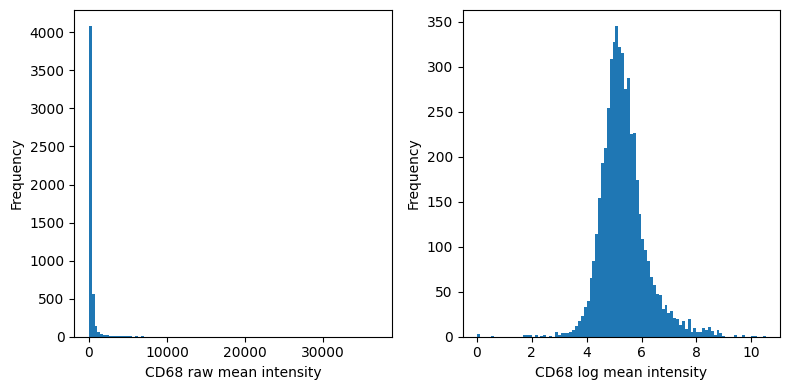

training



0it [00:00, ?it/s]
1it [00:03,  3.08s/it]
2it [00:08,  4.23s/it]
3it [00:12,  4.25s/it]
4it [00:15,  3.79s/it]
5it [00:19,  3.75s/it]
6it [00:23,  3.84s/it]
7it [00:25,  3.47s/it]
8it [00:29,  3.58s/it]
9it [00:32,  3.31s/it]
10it [00:36,  3.55s/it]
11it [00:40,  3.56s/it]
12it [00:42,  3.32s/it]
13it [00:47,  3.65s/it]
14it [00:50,  3.47s/it]
15it [00:54,  3.78s/it]
16it [00:58,  3.72s/it]
17it [01:04,  4.36s/it]
18it [01:11,  5.14s/it]
19it [01:14,  4.61s/it]
20it [01:16,  3.89s/it]
21it [01:19,  3.62s/it]
22it [01:23,  3.70s/it]
23it [01:28,  4.18s/it]
24it [01:32,  3.99s/it]
25it [01:37,  4.17s/it]
26it [01:40,  4.02s/it]
27it [01:45,  4.10s/it]
28it [01:49,  4.30s/it]
29it [01:56,  4.89s/it]
30it [01:59,  4.44s/it]
31it [02:03,  4.22s/it]
32it [02:06,  3.97s/it]
33it [02:11,  4.20s/it]
34it [02:14,  3.92s/it]
35it [02:17,  3.71s/it]
36it [02:21,  3.55s/it]
37it [02:22,  3.05s/it]
38it [02:26,  3.27s/it]
39it [02:30,  3.46s/it]
40it [02:35,  3.85s/it]
41it [02:38,  3.56s/it]
42it 

PanCK
Loaded tiles


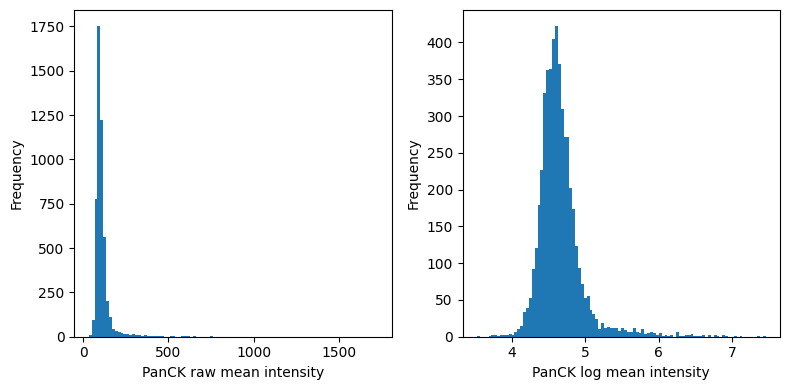

training



0it [00:00, ?it/s]
1it [00:03,  3.66s/it]
2it [00:09,  4.90s/it]
3it [00:12,  4.00s/it]
4it [00:16,  3.88s/it]
5it [00:18,  3.29s/it]
6it [00:24,  4.13s/it]
7it [00:28,  4.22s/it]
8it [00:34,  4.77s/it]
9it [00:38,  4.68s/it]
10it [00:44,  4.83s/it]
11it [00:50,  5.26s/it]
12it [00:58,  6.14s/it]
13it [01:11,  8.28s/it]
14it [01:19,  8.17s/it]
15it [01:22,  6.62s/it]
16it [01:24,  5.20s/it]
17it [01:27,  4.54s/it]
18it [01:29,  3.83s/it]
19it [01:33,  3.92s/it]
20it [01:36,  3.49s/it]
21it [01:42,  4.18s/it]
22it [01:49,  5.29s/it]
23it [01:53,  4.88s/it]
24it [01:56,  4.21s/it]
25it [02:05,  5.49s/it]
26it [02:08,  4.74s/it]
27it [02:13,  5.07s/it]
28it [02:23,  6.56s/it]
29it [02:26,  5.47s/it]
30it [02:28,  4.45s/it]
31it [02:32,  4.23s/it]
32it [02:37,  4.34s/it]
33it [02:41,  4.31s/it]
34it [02:43,  3.72s/it]
35it [02:46,  3.31s/it]
36it [02:48,  3.15s/it]
37it [02:55,  4.31s/it]
38it [03:00,  4.32s/it]
39it [03:03,  3.91s/it]
40it [03:06,  3.69s/it]
41it [03:18,  6.25s/it]
42it 

CD21
Loaded tiles


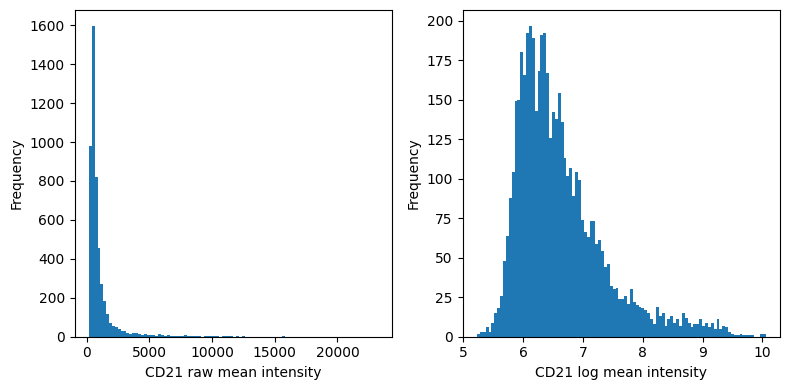

training



0it [00:00, ?it/s]
1it [00:03,  3.86s/it]
2it [00:07,  3.74s/it]
3it [00:09,  2.95s/it]
4it [00:13,  3.16s/it]
5it [00:15,  3.03s/it]
6it [00:19,  3.16s/it]
7it [00:22,  3.32s/it]
8it [00:26,  3.29s/it]
9it [00:33,  4.71s/it]
10it [00:35,  3.85s/it]
11it [00:38,  3.54s/it]
12it [00:43,  3.80s/it]
13it [00:47,  3.95s/it]
14it [00:50,  3.73s/it]
15it [00:53,  3.48s/it]
16it [00:58,  3.84s/it]
17it [01:00,  3.36s/it]
18it [01:03,  3.23s/it]
19it [01:06,  3.21s/it]
20it [01:08,  2.99s/it]
21it [01:11,  2.95s/it]
22it [01:16,  3.34s/it]
23it [01:19,  3.34s/it]
24it [01:23,  3.47s/it]
25it [01:25,  3.10s/it]
26it [01:28,  3.05s/it]
27it [01:31,  2.98s/it]
28it [01:34,  3.03s/it]
29it [01:37,  2.98s/it]
30it [01:41,  3.35s/it]
31it [01:44,  3.17s/it]
32it [01:46,  2.89s/it]
33it [01:49,  2.91s/it]
34it [01:52,  3.05s/it]
35it [01:56,  3.17s/it]
36it [01:59,  3.07s/it]
37it [02:05,  4.16s/it]
38it [02:10,  4.31s/it]
39it [02:14,  4.18s/it]
40it [02:18,  4.10s/it]
41it [02:21,  3.91s/it]
42it 

CD4
Loaded tiles


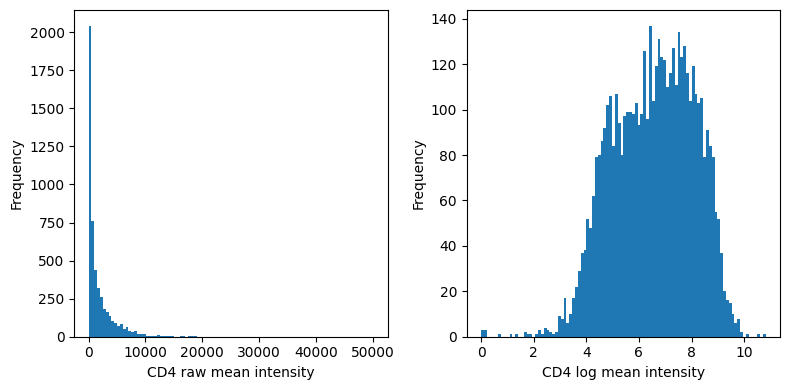

training



0it [00:00, ?it/s]
1it [00:03,  3.33s/it]
2it [00:08,  4.40s/it]
3it [00:13,  4.51s/it]
4it [00:16,  3.92s/it]
5it [00:17,  3.04s/it]
6it [00:20,  2.97s/it]
7it [00:23,  2.88s/it]
8it [00:26,  3.00s/it]
9it [00:31,  3.71s/it]
10it [00:34,  3.59s/it]
11it [00:37,  3.24s/it]
12it [00:41,  3.38s/it]
13it [00:43,  3.00s/it]
14it [00:47,  3.46s/it]
15it [00:51,  3.48s/it]
16it [00:54,  3.34s/it]
17it [00:57,  3.25s/it]
18it [01:02,  3.96s/it]
19it [01:05,  3.51s/it]
20it [01:11,  4.22s/it]
21it [01:15,  4.28s/it]
22it [01:18,  3.85s/it]
23it [01:21,  3.56s/it]
24it [01:24,  3.51s/it]
25it [01:28,  3.40s/it]
26it [01:30,  3.04s/it]
27it [01:33,  3.22s/it]
28it [01:36,  3.00s/it]
29it [01:40,  3.46s/it]
30it [01:44,  3.38s/it]
31it [01:47,  3.46s/it]
32it [01:50,  3.40s/it]
33it [01:54,  3.31s/it]
34it [01:56,  2.94s/it]
35it [02:00,  3.27s/it]
36it [02:02,  3.12s/it]
37it [02:07,  3.55s/it]
38it [02:11,  3.77s/it]
39it [02:22,  5.95s/it]
40it [02:26,  5.32s/it]
41it [02:33,  5.70s/it]
42it 

CD31
Loaded tiles


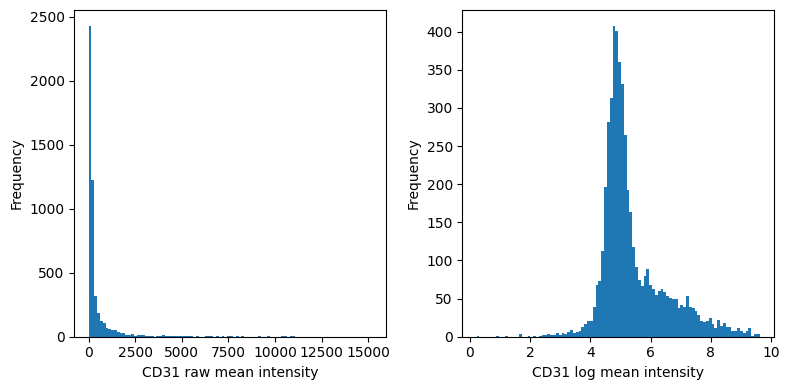

training



0it [00:00, ?it/s]
1it [00:03,  3.80s/it]
2it [00:07,  3.55s/it]
3it [00:11,  3.96s/it]
4it [00:18,  4.92s/it]
5it [00:26,  6.21s/it]
6it [00:32,  6.15s/it]
7it [00:36,  5.32s/it]
8it [00:42,  5.71s/it]
9it [00:52,  6.88s/it]
10it [00:56,  6.04s/it]
11it [01:01,  5.70s/it]
12it [01:03,  4.67s/it]
13it [01:06,  4.28s/it]
14it [01:10,  4.03s/it]
15it [01:16,  4.58s/it]
16it [01:21,  4.76s/it]
17it [01:25,  4.51s/it]
18it [01:29,  4.35s/it]
19it [01:32,  4.06s/it]
20it [01:40,  5.20s/it]
21it [01:47,  5.78s/it]
22it [01:52,  5.37s/it]
23it [01:54,  4.43s/it]
24it [02:01,  5.36s/it]
25it [02:09,  6.02s/it]
26it [02:15,  6.03s/it]
27it [02:22,  6.34s/it]
28it [02:29,  6.53s/it]
29it [02:37,  6.84s/it]
30it [02:45,  7.38s/it]
31it [02:50,  6.69s/it]
32it [03:00,  7.47s/it]
33it [03:03,  6.31s/it]
34it [03:10,  6.41s/it]
35it [03:13,  5.28s/it]
36it [03:18,  5.25s/it]
37it [03:24,  5.71s/it]
38it [03:32,  6.37s/it]
39it [03:37,  5.78s/it]
40it [03:41,  5.38s/it]
41it [03:43,  4.26s/it]
42it 

CD45RO
Loaded tiles


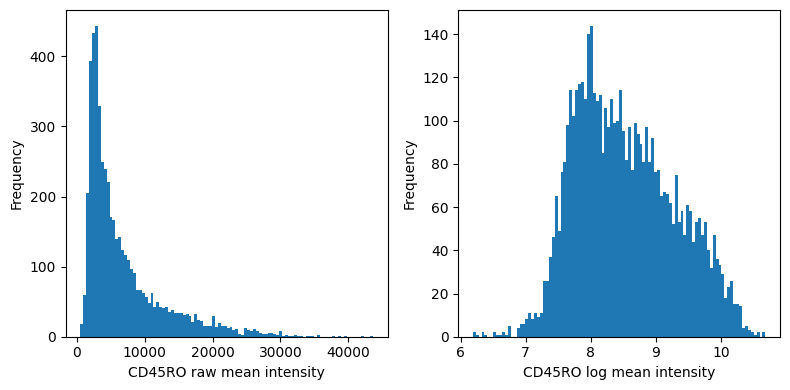

training



0it [00:00, ?it/s]
1it [00:08,  8.97s/it]
2it [00:17,  8.79s/it]
3it [00:22,  7.16s/it]
4it [00:30,  7.51s/it]
5it [00:36,  6.85s/it]
6it [00:43,  6.94s/it]
7it [00:51,  7.19s/it]
8it [00:56,  6.37s/it]
9it [01:05,  7.41s/it]
10it [01:09,  6.27s/it]
11it [01:16,  6.46s/it]
12it [01:22,  6.37s/it]
13it [01:32,  7.52s/it]
14it [01:36,  6.51s/it]
15it [01:41,  6.00s/it]
16it [01:53,  7.68s/it]
17it [02:16, 12.45s/it]
18it [02:23, 10.59s/it]
19it [02:36, 11.50s/it]
20it [02:45, 10.60s/it]
21it [02:48,  8.45s/it]
22it [02:55,  8.03s/it]
23it [03:01,  7.26s/it]
24it [03:05,  6.30s/it]
25it [03:12,  6.47s/it]
26it [03:22,  7.56s/it]
27it [03:31,  7.95s/it]
28it [03:35,  6.94s/it]
29it [03:38,  5.70s/it]
30it [03:48,  6.90s/it]
31it [03:53,  6.54s/it]
32it [03:58,  5.88s/it]
33it [04:03,  5.75s/it]
34it [04:07,  5.21s/it]
35it [04:11,  4.93s/it]
36it [04:16,  4.88s/it]
37it [04:23,  5.47s/it]
38it [04:30,  6.06s/it]
39it [04:35,  5.74s/it]
40it [04:40,  5.28s/it]
41it [04:47,  6.01s/it]
42it 

CD11c
Loaded tiles


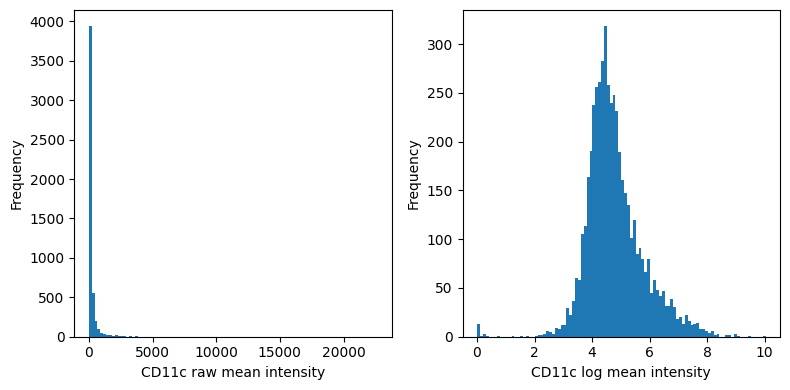

training



0it [00:00, ?it/s]
1it [00:09,  9.39s/it]
2it [00:15,  7.50s/it]
3it [00:18,  5.53s/it]
4it [00:20,  4.23s/it]
5it [00:23,  3.57s/it]
6it [00:27,  3.71s/it]
7it [00:36,  5.54s/it]
8it [00:56, 10.05s/it]
9it [01:01,  8.45s/it]
10it [01:08,  8.15s/it]
11it [01:15,  7.72s/it]
12it [01:22,  7.48s/it]
13it [01:29,  7.37s/it]
14it [01:35,  6.88s/it]
15it [01:46,  8.19s/it]
16it [02:01, 10.19s/it]
17it [02:12, 10.40s/it]
18it [02:19,  9.34s/it]
19it [02:22,  7.49s/it]
20it [02:25,  6.33s/it]
21it [02:36,  7.73s/it]
22it [02:54, 10.68s/it]
23it [03:01,  9.57s/it]
24it [03:09,  9.14s/it]
25it [03:15,  8.20s/it]
26it [03:18,  6.63s/it]
27it [03:21,  5.49s/it]
28it [03:31,  6.91s/it]
29it [03:42,  8.05s/it]
30it [03:47,  7.31s/it]
31it [03:53,  6.67s/it]
32it [04:01,  7.32s/it]
33it [04:08,  7.07s/it]
34it [04:15,  7.04s/it]
35it [04:21,  6.75s/it]
36it [04:28,  6.68s/it]
37it [04:30,  5.31s/it]
38it [04:36,  5.48s/it]
39it [04:43,  6.19s/it]
40it [04:48,  5.61s/it]
41it [04:55,  6.05s/it]
42it 

HLA-DR
Loaded tiles


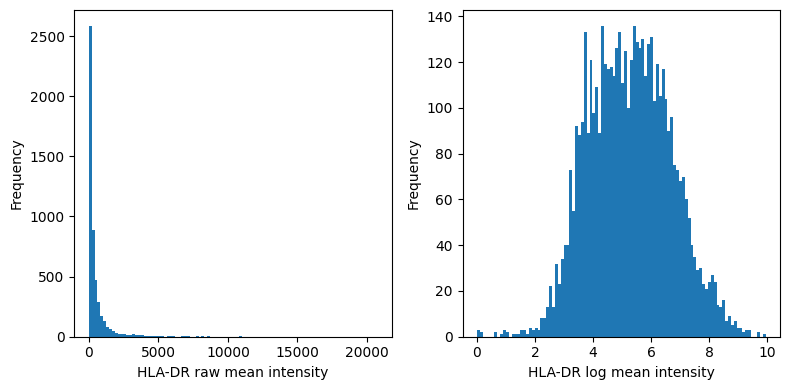

training



0it [00:00, ?it/s]
1it [00:07,  7.59s/it]
2it [00:11,  5.43s/it]
3it [00:14,  4.26s/it]
4it [00:18,  4.33s/it]
5it [00:25,  5.05s/it]
6it [00:31,  5.56s/it]
7it [00:37,  5.59s/it]
8it [00:40,  4.88s/it]
9it [00:44,  4.59s/it]
10it [00:53,  5.81s/it]
11it [00:59,  5.82s/it]
12it [01:03,  5.39s/it]
13it [01:16,  7.67s/it]
14it [01:22,  7.29s/it]
15it [01:32,  8.01s/it]
16it [01:45,  9.55s/it]
17it [01:49,  7.98s/it]
18it [02:01,  8.94s/it]
19it [02:14, 10.40s/it]
20it [02:20,  9.07s/it]
21it [02:27,  8.48s/it]
22it [02:41,  9.96s/it]
23it [02:51, 10.11s/it]
24it [03:05, 11.07s/it]
25it [03:10,  9.42s/it]
26it [03:19,  9.24s/it]
27it [03:37, 11.71s/it]
28it [03:40,  9.30s/it]
29it [03:45,  7.89s/it]
30it [03:49,  6.92s/it]
31it [03:53,  5.88s/it]
32it [03:57,  5.26s/it]
33it [04:03,  5.65s/it]
34it [04:26, 10.90s/it]
35it [04:38, 10.96s/it]
36it [04:47, 10.47s/it]
37it [04:50,  8.21s/it]
38it [04:56,  7.54s/it]
39it [06:22, 31.05s/it]
40it [06:26, 23.17s/it]
41it [06:34, 18.56s/it]
42it 

In [3]:
dataPath = '/project/zunderlab/heussner/Projects/morph/data/CODEX_LN/'
savePath = '/project/zunderlab/heussner/Projects/morph/results/'

markers = ['DAPI','CD8','CD3','CD20','Ki67','CD68','PanCK','CD21','CD4','CD31','CD45RO','CD11c','HLA-DR']

results_dict = {}

before_pearson = []
after_pearson = []
before_spearman = []
after_spearman = []

table = pd.read_csv(os.path.join(dataPath,'CODEX_LN_table.csv'))

for marker in tqdm(markers):
    print(marker)
    tilePath = os.path.join(dataPath,f'CODEX_LN_tiles/{marker}.pkl')
    with open(tilePath,'rb') as handle:
        tiles = pickle.load(handle)
    
    #sampleSize = 5000
    #sample = random.sample(tilePaths,5000) # sample from tiles (100k tiles takes too long - probably more efficient to store in a mega array rather than individual images)

    labelOrder = [] # need order of cells to match X's and Y's
    X = []
    meanIntensities = []
    for label, tile in tiles.items():
        labelOrder.append(label)#.  .append(int(p.split('_')[1].split('.')[0])) # file name corresponds to cell ID
        meanIntensities.append(np.mean(tile[tile>0]))
        X.append(tile)
    
    X = np.array(X)
    meanIntensities = np.array(meanIntensities)
    labelOrder = np.array(labelOrder)
    
    sample_indices = random.sample([i for i in range(len(labelOrder))],5000)
    X = X[sample_indices]
    meanIntensities = meanIntensities[sample_indices]
    labelOrder = labelOrder[sample_indices]
    print('Loaded tiles')   
    table_ = table[table['label'].isin(list(labelOrder))].copy() # filter out unsampled cells
    table_ = table_.sort_values(by="label", key=lambda column: column.map(lambda e: list(labelOrder).index(e))) # sort table rows to be in same order as cell tiles
    
    Y_ = table_[marker].to_numpy() # select marker mean intensity
    Y = np.log(1+Y_) # log transform
    fig, ax = plt.subplots(1,2,figsize=(8,4))
    ax[0].hist(Y_,bins=100)
    ax[0].set_xlabel(f'{marker} raw mean intensity')
    ax[0].set_ylabel('Frequency')
    ax[1].hist(Y,bins=100)
    ax[1].set_xlabel(f'{marker} log mean intensity')
    ax[1].set_ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(os.path.join(savePath,f'{marker}_syntheticBatchDistribution.png'),dpi=500,bbox_inches='tight')
    plt.show()
    Y = (Y - min(Y))/(max(Y) - min(Y)) # min-max norm
    
    xy = np.vstack([Y,np.array(meanIntensities)])
    z = gaussian_kde(xy)(xy) # density color

    before_pearson.append(pearsonr(Y, meanIntensities)[0])
    before_spearman.append(spearmanr(Y, meanIntensities)[0])
    print('training')
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    epochs = 45
    model, train_loss, test_loss = train(X_train, Y_train, X_test, Y_test, epochs)

    epoch_x = [i for i in range(epochs)]
    
    Y_pred = test(X_test,Y_test, model)
    
    xy = np.vstack([Y_test,Y_pred])
    z = gaussian_kde(xy)(xy) # density color

    after_pearson.append(pearsonr(Y_test, Y_pred)[0])
    after_spearman.append(spearmanr(Y_test, Y_pred)[0])
    
    del X
    del Y
    del model
    del X_train
    del Y_train
    del X_test
    del Y_test

results_dict = {'before_pearson':before_pearson, 'after_pearson':after_pearson, 'before_spearman':before_spearman, 'after_spearman':after_spearman} 
    
with open(os.path.join(savePath,'CNN_logResults.pkl'),'wb') as handle:
    pickle.dump(results_dict, handle)

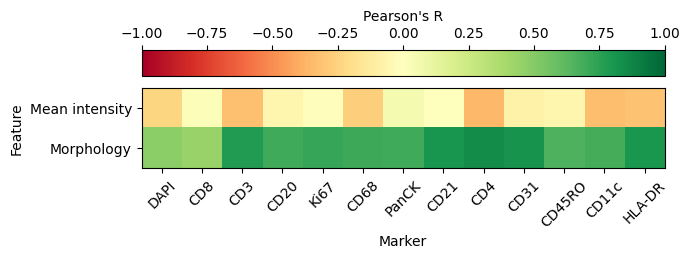

In [10]:
fig, ax = plt.subplots(figsize=(7,3))
im = ax.imshow(np.vstack([before_pearson, after_pearson]),vmin=-1,vmax=1,cmap='RdYlGn')
cbar = fig.colorbar(im, ax=ax, location='top')
cbar.set_label("Pearson's R")
ax.set_xticks([i for i in range(len(markers))],markers,rotation=45)
ax.set_yticks([0,1],['Mean intensity','Morphology'])
ax.set_xlabel('Marker')
ax.set_ylabel('Feature')
plt.tight_layout()
plt.savefig(os.path.join(savePath,'PearsonCorrelationLog.png'),dpi=500, bbox_inches='tight')
plt.show()

In [11]:
after_pearson

[0.48210048702193486,
 0.44303689883383585,
 0.7797300227399135,
 0.7026398210554309,
 0.7218726248243438,
 0.7087257385266322,
 0.6955854249697186,
 0.8122898314536713,
 0.8478007828737639,
 0.8152010933112981,
 0.6593462145126956,
 0.6817588574880211,
 0.7980010336213812]

In [8]:
before_spearman

[-0.018186227324631012,
 -0.01454558967122276,
 -0.4263140148027117,
 -0.012481217762656866,
 -0.06193478424906117,
 -0.33926511263832576,
 0.0020861179387787654,
 0.02293564691053225,
 -0.5114897292352185,
 -0.1232237891681555,
 -0.04087148200988133,
 -0.42027542080531033,
 -0.4761550854633512]